In [1]:
import pandas as pd 
import numpy as np 
# Used to manipulated the images 
import cv2 
np.random.seed(1337) 

# Import Keras 00

import Kernel as ker

Using TensorFlow backend.
C:\Users\wh0n1x\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\wh0n1x\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\wh0n1x\anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\wh0n1x\anaconda3\env

In [2]:
df_train = pd.read_json('train.json') # this is a dataframe

In [3]:
df_train

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0
...,...,...,...,...,...
1599,04e11240,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712077999999998, ...",na,0
1600,c7d6f6f8,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",na,0
1601,bba1a0f1,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",na,0
1602,7f66bb44,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",na,0


In [4]:
Xtrain = ker.get_scaled_imgs(df_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


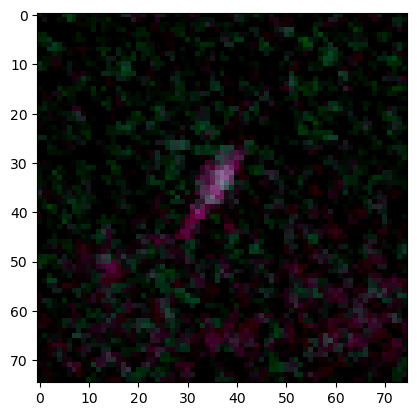

In [5]:
#plot one image to verify our transformation
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(Xtrain[6], interpolation='nearest')
plt.show()

In [6]:
Ytrain = np.array(df_train['is_iceberg'])
len(Ytrain)

1604

In [7]:
df_train.inc_angle = df_train.inc_angle.replace('na',0)
idx_tr = np.where(df_train.inc_angle>0)

In [8]:
idx_tr[0]

array([   0,    1,    2, ..., 1506, 1507, 1508], dtype=int64)

In [9]:
Ytrain = Ytrain[idx_tr[0]]
Xtrain = Xtrain[idx_tr[0],...]
print('the lenght of Ytrain : ',len(Ytrain))
print('the lenght of the idx_tr : ',len(idx_tr[0]))
print('the lenght of the Xtrain :',len(Xtrain))

the lenght of Ytrain :  1471
the lenght of the idx_tr :  1471
the lenght of the Xtrain : 1471


In [10]:
Xtr_more = ker.get_more_images(Xtrain)

In [11]:
Ytr_more = np.concatenate((Ytrain,Ytrain,Ytrain))

In [12]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
model = ker.getModel()
model.summary()

batch_size = 32
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 17, 128)       0         
_________________________

C:\Users\wh0n1x\anaconda3\envs\Tensorflow\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [13]:
model.fit(Xtr_more, Ytr_more, batch_size=batch_size, epochs=30, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_split=0.25)


Train on 3309 samples, validate on 1104 samples
Epoch 1/30
3309/3309 [==============================] - 67s 20ms/step - loss: 0.5527 - accuracy: 0.7053 - val_loss: 0.4027 - val_accuracy: 0.8270
Epoch 2/30
3309/3309 [==============================] - 65s 20ms/step - loss: 0.4192 - accuracy: 0.8093 - val_loss: 0.4813 - val_accuracy: 0.7708
Epoch 3/30
3309/3309 [==============================] - 67s 20ms/step - loss: 0.3366 - accuracy: 0.8495 - val_loss: 0.3717 - val_accuracy: 0.8732
Epoch 4/30
3309/3309 [==============================] - 66s 20ms/step - loss: 0.2858 - accuracy: 0.8697 - val_loss: 0.2680 - val_accuracy: 0.8995
Epoch 5/30
3309/3309 [==============================] - 65s 20ms/step - loss: 0.2511 - accuracy: 0.8939 - val_loss: 0.2908 - val_accuracy: 0.8813
Epoch 6/30
3309/3309 [==============================] - 67s 20ms/step - loss: 0.2343 - accuracy: 0.9000 - val_loss: 0.2397 - val_accuracy: 0.9094
Epoch 7/30
3309/3309 [==============================] - 67s 20ms/step - los

In [13]:
model.load_weights('.mdl_wts.hdf5')

score = model.evaluate(Xtrain, Ytrain, verbose=1)
print('Train score:', score[0])
print('Train accuracy:', score[1])


1471/1471 [==============================] - 6s 4ms/step
Train score: 0.10804254682968864
Train accuracy: 0.9619306325912476


In [14]:
from Kernel import get_scaled_imgs
df_test = pd.read_json('test.json')
df_test.inc_angle = df_test.inc_angle.replace('na',0)
Xtest = (get_scaled_imgs(df_test))
pred_test = model.predict(Xtest)

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('submission.csv', index=False)

         id  is_iceberg
0  5941774d    0.109391
1  4023181e    0.992879
2  b20200e4    0.082372
3  e7f018bb    0.999626
4  4371c8c3    0.996305
5  a8d9b1fd    0.153790
6  29e7727e    0.047179
7  92a51ffb    0.999792
8  c769ac97    0.000221
9  aee0547d    0.000382
